# Supply Chain 02 -  Market demand prediction
*This notebook illustrates methods to predict the demand series of a supply chain.*
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os
from IPython.display import display, HTML #display dataframe

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=500)


In [4]:
#print nodes dataframe
display(HTML(D_mov.to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,19,NODE_19,41.819430,15.040400,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:53:43.693126,2020-01-02 00:36:38.968923,10,NODE_10,41.477952,15.044802,2020-01-02 11:11:44.595809,2020-01-02 12:11:44.595809,2020-01-02 11:08:01.237122,2020-01-02 12:10:51.578807,0,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,9.154055,2020-01-01 05:24:09.931406,FEU CONTAINER,USER_0
0,23,NODE_23,41.597447,14.658330,2020-01-02 12:29:27.456258,2020-01-02 13:29:27.456258,2020-01-02 12:37:03.440961,2020-01-02 13:33:48.435419,1,NODE_1,41.540538,14.497259,2020-01-02 18:00:47.794273,2020-01-02 19:00:47.794273,2020-01-02 18:01:30.117211,2020-01-02 19:07:52.553733,1,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,4.585211,2019-12-09 07:34:51.580054,FEU CONTAINER,USER_7
0,4,NODE_4,41.754958,14.298647,2020-01-02 19:29:35.061284,2020-01-02 20:29:35.061284,2020-01-02 19:33:48.944422,2020-01-02 20:30:27.103668,2,NODE_2,41.467850,14.437587,2020-01-03 05:50:27.714162,2020-01-03 06:50:27.714162,2020-01-03 05:48:57.310436,2020-01-03 06:53:59.345551,0,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,9.781449,2019-12-31 17:57:26.350149,TEU CONTAINER,USER_3
0,12,NODE_12,41.520882,14.954333,2020-01-03 10:20:13.174939,2020-01-03 11:20:13.174939,2020-01-03 10:02:10.056764,2020-01-03 10:48:51.270233,6,NODE_6,41.931723,14.414652,2020-01-04 09:41:09.720468,2020-01-04 10:41:09.720468,2020-01-04 09:48:20.771094,2020-01-04 10:31:53.018699,0,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,6.988469,2019-12-31 09:26:50.890680,FEU CONTAINER,USER_1
0,9,NODE_9,41.570922,14.353983,2020-01-04 15:59:21.232282,2020-01-04 16:59:21.232282,2020-01-04 16:06:57.128156,2020-01-04 16:58:35.961237,15,NODE_15,41.439723,14.653611,2020-01-05 00:23:59.776814,2020-01-05 01:23:59.776814,2020-01-05 00:27:34.716370,2020-01-05 01:18:44.137962,1,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,1.689685,2020-01-04 02:57:06.950101,FEU CONTAINER,USER_0
0,12,NODE_12,41.520882,14.954333,2020-01-05 04:16:52.869946,2020-01-05 05:16:52.869946,2020-01-05 04:30:32.229860,2020-01-05 05:26:35.147879,7,NODE_7,41.554133,13.992593,2020-01-05 21:35:32.000303,2020-01-05 22:35:32.000303,2020-01-05 21:38:19.698986,2020-01-05 22:45:41.674904,1,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,9.420193,2019-12-29 02:40:53.231806,TEU CONTAINER,USER_1
0,14,NODE_14,41.866128,14.125651,2020-01-05 23:53:00.665371,2020-01-06 00:53:00.665371,2020-01-05 23:59:23.248123,2020-01-06 00:50:01.684989,7,NODE_7,41.554133,13.992593,2020-01-06 10:24:33.881435,2020-01-06 11:24:33.881435,2020-01-06 10:15:03.028038,2020-01-06 11:29:54.568218,1,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,3.335261,2020-01-03 19:43:13.058421,FEU CONTAINER,USER_7
0,13,NODE_13,41.797298,14.654314,2020-01-06 13:57:57.094919,2020-01-06 14:57:57.094919,2020-01-06 13:58:02.649699,2020-01-06 14:41:59.026554,8,NODE_8,41.725281,14.617102,2020-01-06 17:44:24.422525,2020-01-06 18:44:24.422525,2020-01-06 17:45:21.581014,2020-01-06 18:23:21.310022,1,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,2.847857,2020-01-04 08:28:41.569545,FEU CONTAINER,USER_6
0,8,NODE_8,41.725281,14.617102,2020-01-06 18:44:48.773193,2020-01-06 19:44:48.773193,2020-01-06 19:01:55.008118,2020-01-06 19:15:48.709455,18,NODE_18,41.661300,14.043152,2020-01-07 10:11:59.285063,2020-01-07 11:11:59.285063,2020-01-07 09:39:32.348674,2020-01-07 11:14:34.364629,1,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,7.981981,2020-01-04 00:11:53.419830,FEU CONTAINER,USER_6
0,11,NODE_11,41.543645,14.564274,2020-01-07 15:36:54.353580,2020-01-07 16:36:54.353580,2020-01-07 15:49:39.636130,2020-01-07 16:53:31.003429,20,NODE_20,41.482399,15.007454,2020-01-08 03:02:01.222666,2020-01-08 04:02:01.222666,2020-01-08 03:11:49.755675,2020-01-08 04:05:26.913572,1,PRODUCT_FAMILY 1,CLIE

### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
prediction_results_path = os.path.join(root_path,f"P9_predictions")

os.makedirs(root_path, exist_ok=True)
os.makedirs(prediction_results_path, exist_ok=True)

### Build the time series

In [6]:
D_time = D_mov.groupby(['TIMESTAMP_IN']).agg({'QUANTITY':['sum'],'TIMESTAMP_IN':['size']}).reset_index()
D_time.columns = ['TIMESTAMP', 'QUANTITY','COUNT']
#print the series
display(HTML(D_time.to_html()))

,TIMESTAMP,QUANTITY,COUNT
0,2019-12-09 07:34:51.580054,4.585211,1
1,2019-12-15 20:22:39.124694,3.016903,1
2,2019-12-20 00:42:39.112417,5.167381,1
3,2019-12-23 17:39:28.013599,4.463370,1
4,2019-12-27 05:55:09.643223,2.729125,1
5,2019-12-27 16:00:01.761877,9.415418,1
6,2019-12-29 02:40:53.231806,9.420193,1
7,2019-12-30 01:31:52.713917,1.728624,1
8,2019-12-31 04:44:52.490560,3.503477,1
9,2019-12-31 09:26:50.890680,6.988469,1


### SARIMA predictions

In [7]:
from analogistics.supply_chain.P9_workload_prediction.demand_predicter import LOOP_PREDICT_SARIMA
LOOP_PREDICT_SARIMA(D_time, 
                    date_field='TIMESTAMP',
                    qtyVariable='QUANTITY',
                    countVariable='COUNT',
                    prediction_results_path = prediction_results_path, 
                    filterVariable = [],
                    samplingInterval='week')
#check the destination folder to analyse the results

***********[]*************
The initial series is stationary


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
..\analogistics\statistics\time_series.py:226: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem

The initial series is stationary


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
..\analogistics\statistics\time_series.py:226: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(lag_acf, linefmt='skyblue', markerfmt='d')
..\analogistics\statistics\time_series.py:235: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument t

True

### Predict the inventory of a vehicle

**** DEFINE D MOV IN/OUT ****
**** DEFINE ROUTES  ****


..\analogistics\supply_chain\P8_performance_assessment\vehicle_assessment.py:79: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  D = pd.concat([D1, D2])


**** INVENTORY ESTIMATE  ****
==estimate inventory voyage TRUCK 1, with 995 movements


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,arcFrom,arcTo,departureFromALAP,arrivalToASAP,inventory,capacity,VEHICLE_CODE_from,ATA_from,ATD_from,Movementquantity_from,...,LOADING_NODE_LATITUDE_to,LOADING_NODE_LONGITUDE_to,PACKAGE_DESCRIPTION_to,PRODUCT_FAMILY_to,PTA_to,PTD_to,QUANTITY_to,TIMESTAMP_IN_to,USER_to,VOYAGE_CODE_to
0,19,10,2020-01-02 00:36:38.968923,2020-01-02 11:08:01.237122,9.154055,0.813475,TRUCK 1,2020-01-01 23:53:43.693126,2020-01-02 00:36:38.968923,9.154055,...,[41.81943011840303],[15.040399736708777],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-01-02 11:11:44.595809],[2020-01-02 12:11:44.595809],[9.154054973588751],[2020-01-01 05:24:09.931406],[USER_0],[0]
0,10,23,2020-01-02 12:10:51.578807,2020-01-02 12:37:03.440961,0.000000,9.967530,TRUCK 1,2020-01-02 11:08:01.237122,2020-01-02 12:10:51.578807,-9.154055,...,[41.59744711199511],[14.65833038679483],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-01-02 12:29:27.456258],[2020-01-02 13:29:27.456258],[4.585211254495236],[2019-12-09 07:34:51.580054],[USER_7],[0]
0,23,1,2020-01-02 13:33:48.435419,2020-01-02 18:01:30.117211,4.585211,5.382319,TRUCK 1,2020-01-02 12:37:03.440961,2020-01-02 13:33:48.435419,4.585211,...,[41.59744711199511],[14.65833038679483],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-01-02 18:00:47.794273],[2020-01-02 19:00:47.794273],[4.585211254495236],[2019-12-09 07:34:51.580054],[USER_7],[0]
0,1,4,2020-01-02 19:07:52.553733,2020-01-02 19:33:48.944422,0.000000,9.967530,TRUCK 1,2020-01-02 18:01:30.117211,2020-01-02 19:07:52.553733,-4.585211,...,[41.754958044690895],[14.298646822034542],[TEU CONTAINER],[PRODUCT_FAMILY 1],[2020-01-02 19:29:35.061284],[2020-01-02 20:29:35.061284],[9.78144917812369],[2019-12-31 17:57:26.350149],[USER_3],[0]
0,4,2,2020-01-02 20:30:27.103668,2020-01-03 05:48:57.310436,9.781449,0.186081,TRUCK 1,2020-01-02 19:33:48.944422,2020-01-02 20:30:27.103668,9.781449,...,[41.754958044690895],[14.298646822034542],[TEU CONTAINER],[PRODUCT_FAMILY 1],[2020-01-03 05:50:27.714162],[2020-01-03 06:50:27.714162],[9.78144917812369],[2019-12-31 17:57:26.350149],[USER_3],[0]


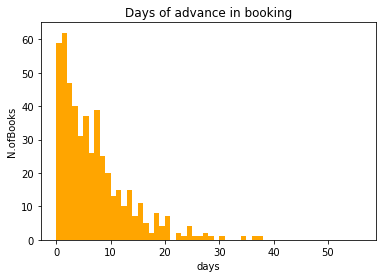

In [8]:
# generate arc flow data using the VEHICLE STATISTICS
from analogistics.supply_chain.P8_performance_assessment.vehicle_assessment import voyageStatistics

#columns movements data
movementColumns= {
           'timevariable':'TIMESTAMP_IN', #colonna obbligatoria con i timestamp per ogni movimento
           'capacityField':'QUANTITY', #colonna obblicatoria che identifica la quantita' movimentata
           
            'vehiclefield':'VEHICLE_CODE', #colonna che identifica il veicolo utilizzato
           
            'terminalfieldFrom':'LOADING_NODE', #colonna che identifica il nodo di carico
            'terminalfieldto':'DISCHARGING_NODE', #colonna che identifica il nodo di scarico
    
            
           }

timeColumns = {'loadingpta':'PTA_FROM',
               'loadingptd':'PTD_FROM', 
               'dischargingpta':'PTA_TO', 
               'dischargingptd':'PTD_TO', 
               'loadingata':'ATA_FROM', 
               'loadingatd':'ATD_FROM', 
               'dischargingata':'ATA_TO', 
               'dischargingatd':'ATD_TO'
               }
         
        
#define arc table
_,  D_arcs_route, _  = voyageStatistics(D_mov,
                                    timefield=movementColumns['timevariable'],
                                    locfrom = movementColumns['terminalfieldFrom'],
                                    locto= movementColumns['terminalfieldto'],
                                    timeColumns = timeColumns,
                                    capacityField=movementColumns['capacityField'],
                                    voyagefield =movementColumns['vehiclefield'],
                                    censoredData=False, #use complete data   
                                    actual='ACTUAL') #use actual data 
#print resulting dataframe
D_arcs_route.head()

,arcFrom,arcTo,departureFromALAP,arrivalToASAP,inventory_x,capacity,VEHICLE_CODE_from,ATA_from,ATD_from,Movementquantity_from,CLIENT_from,DISCHARGING_LATITUDE_from,DISCHARGING_LONGITUDE_from,DISCHARGING_NODE_DESCRIPTION_from,ITEMCODE_from,InOut_from,LOADING_NODE_DESCRIPTION_from,LOADING_NODE_LATITUDE_from,LOADING_NODE_LONGITUDE_from,PACKAGE_DESCRIPTION_from,PRODUCT_FAMILY_from,PTA_from,PTD_from,QUANTITY_from,TIMESTAMP_IN_from,USER_from,VOYAGE_CODE_from,VEHICLE_CODE_to,ATA_to,ATD_to,Movementquantity_to,CLIENT_to,DISCHARGING_LATITUDE_to,DISCHARGING_LONGITUDE_to,DISCHARGING_NODE_DESCRIPTION_to,ITEMCODE_to,InOut_to,LOADING_NODE_DESCRIPTION_to,LOADING_NODE_LATITUDE_to,LOADING_NODE_LONGITUDE_to,PACKAGE_DESCRIPTION_to,PRODUCT_FAMILY_to,PTA_to,PTD_to,QUANTITY_to,TIMESTAMP_IN_to,USER_to,VOYAGE_CODE_to,hour_shift,day_shift,week_shift,month_shift
123,14,20,2020-02-14 01:00:40.374358,2020-02-14 01:56:42.057189,0.000000,9.967530,TRUCK 1,2020-02-13 23:22:28.907466,2020-02-14 01:00:40.374358,-3.383075,[CLIENT 2],[41.866127989598624],[14.125651261998355],[NODE_14],[0],[OUT],[NODE_21],[41.47714868624782],[14.976855036927924],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-02-14 00:00:25.832546],[2020-02-14 01:00:25.832546],[3.383075199472238],[2020-02-06 11:25:56.009720],[USER_4],[2],TRUCK 1,2020-02-14 01:56:42.057189,2020-02-14 02:35:52.553717,6.244513,[CLIENT 2],[41.820190277568074],[14.54709526552308],[NODE_3],[0],[IN],[NODE_20],[41.482399005855754],[15.00745426517459],[TEU CONTAINER],[PRODUCT_FAMILY 1],[2020-02-14 01:30:06.274807],[2020-02-14 02:30:06.274807],[6.244513407212127],[2020-01-26 06:11:04.698254],[USER_4],[2],3.383075,3.383075,3.367272,0.000000
127,3,0,2020-02-15 04:00:46.281983,2020-02-15 07:49:41.905481,0.000000,9.967530,TRUCK 1,2020-02-15 02:52:32.389500,2020-02-15 04:00:46.281983,-6.379776,[CLIENT 2],[41.820190277568074],[14.54709526552308],[NODE_3],[0],[OUT],[NODE_23],[41.59744711199511],[14.65833038679483],[TEU CONTAINER],[PRODUCT_FAMILY 1],[2020-02-15 02:57:54.891350],[2020-02-15 03:57:54.891350],[6.3797761889918325],[2020-02-07 15:11:35.238747],[USER_2],[2],TRUCK 1,2020-02-15 07:49:41.905481,2020-02-15 08:17:24.429061,7.270867,[CLIENT 2],[41.570921963188574],[14.35398267767394],[NODE_9],[0],[IN],[NODE_0],[41.70077556850373],[13.97462802711493],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-02-15 07:46:50.797002],[2020-02-15 08:46:50.797002],[7.270866728742735],[2020-02-13 19:08:08.861016],[USER_1],[2],6.379776,6.244513,8.829661,5.335051
137,14,11,2020-02-19 13:00:40.001096,2020-02-19 14:18:42.175241,0.000000,9.967530,TRUCK 1,2020-02-19 12:17:11.040807,2020-02-19 13:00:40.001096,-7.431070,[CLIENT 2],[41.866127989598624],[14.125651261998355],[NODE_14],[1],[OUT],[NODE_1],[41.540538148808736],[14.497258501447167],[TEU CONTAINER],[PRODUCT_FAMILY 1],[2020-02-19 12:14:29.972267],[2020-02-19 13:14:29.972267],[7.431069658209594],[2020-02-06 03:11:56.327796],[USER_7],[2],TRUCK 1,2020-02-19 14:18:42.175241,2020-02-19 15:20:19.452726,7.387618,[CLIENT 2],[41.81943011840303],[15.040399736708777],[NODE_19],[1],[IN],[NODE_11],[41.543644956368915],[14.564273814854287],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-02-19 14:19:53.567157],[2020-02-19 15:19:53.567157],[7.387618308014777],[2020-02-19 02:08:11.826068],[USER_7],[2],7.431070,6.801752,3.383075,3.503477
178,18,2,2020-03-05 03:00:48.465420,2020-03-05 18:08:27.858121,5.748977,4.218553,TRUCK 1,2020-03-05 01:31:04.100003,2020-03-05 03:00:48.465420,5.748977,[CLIENT 2],[41.46785003953858],[14.437587261844092],[NODE_2],[1],[IN],[NODE_18],[41.66130029805437],[14.043151949877279],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-03-05 01:33:26.895393],[2020-03-05 02:33:26.895393],[5.748976771680374],[2020-03-01 05:08:52.222135],[USER_6],[3],TRUCK 1,2020-03-05 18:08:27.858121,2020-03-05 18:48:37.686517,-5.748977,[CLIENT 2],[41.46785003953858],[14.437587261844092],[NODE_2],[1],[OUT],[NODE_18],[41.66130029805437],[14.043151949877279],[FEU CONTAINER],[PRODUCT_FAMILY 1],[2020-03-05 17:45:20.667183],[2020-03-05 18:45:20.6

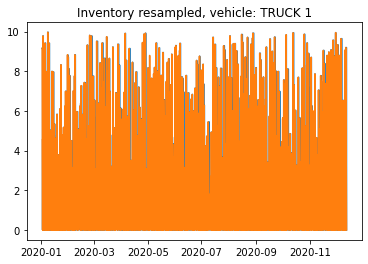

In [9]:
#resample the time series for each vehicle
import pandas as pd
import matplotlib.pyplot as plt
D=pd.DataFrame()
for vehicle in set(D_arcs_route['VEHICLE_CODE_from']):
    #vehicle ='Vessel 1'
    D_filtered = D_arcs_route[D_arcs_route['VEHICLE_CODE_from']==vehicle]
    D_filtered['TIMESTAMP'] = D_filtered['departureFromALAP']
    D_filtered = D_filtered.sort_values(by = ['TIMESTAMP'])
    
    
    #build a equispaced series
    D_series = D_filtered[['TIMESTAMP','inventory']]
    D_series = D_series.set_index('TIMESTAMP')
    
    D_series_resampled = D_series.resample('H').mean()
    D_series_resampled['inventory'] = D_series_resampled['inventory'].fillna(method ='ffill') 
    
    #sample plot
    plt.figure()
    plt.plot(D_series_resampled.index,D_series_resampled['inventory'])
    plt.plot(D_series.index,D_series['inventory'])
    plt.title(f"Inventory resampled, vehicle: {vehicle}")
    
    #hour shift
    D_series_resampled['hour_shift'] = D_series_resampled['inventory'].shift(1)
    
    #day shift
    D_series_resampled['day_shift'] = D_series_resampled['inventory'].shift(24)
    
    #week shift
    D_series_resampled['week_shift'] = D_series_resampled['inventory'].shift(24*7)
    
    #month shift
    D_series_resampled['month_shift'] = D_series_resampled['inventory'].shift(24*30)
    D_series_resampled=D_series_resampled.dropna()
    D_series_resampled['TIMESTAMP_HOUR'] = D_series_resampled.index
    D_series_resampled['TIMESTAMP_HOUR'] = D_series_resampled['TIMESTAMP_HOUR'].dt.strftime('%Y-%m-%d %H:%M:00')
    
    #join with the original
    D_filtered['TIMESTAMP_HOUR'] = D_filtered['TIMESTAMP'].dt.strftime('%Y-%m-%d %H:%M:00')
    D_filtered = D_filtered.merge(D_series_resampled, on = 'TIMESTAMP_HOUR', how = 'left')
    D_filtered = D_filtered.dropna(subset = ['month_shift'])
    D_filtered = D_filtered.drop(columns=['TIMESTAMP','TIMESTAMP_HOUR','inventory_y'])
    D=D.append(D_filtered)

#print resulting dataframe
display(HTML(D.to_html()))

In [10]:
#Preprocess for machine learning
#define the learning table
X=pd.DataFrame()

#define the target variable
X['y'] = D['inventory_x']


In [11]:
import ast
def returnDummyColumnsFromList(D, columnName):
    '''
    extract the value from a pandas cell where a list is saved

    Parameters
    ----------
    D : TYPE pandas dataframe
        DESCRIPTION.
    columnName : TYPE
        DESCRIPTION.

    Returns
    -------
    s : TYPE column string name
        DESCRIPTION.

    '''
    x = D[columnName].values
    #print(x)
    #print(type(x))
    newList=[]
    for j in x:
        for i in j:
            i = str(i)
            yyy = i.replace('nan,','')
            yyy = yyy.replace('nan','')
            newList.append(ast.literal_eval(yyy))


    s = pd.Series(newList)
    #X_add=pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
    #print(s)
    return s

In [12]:
#convert variables extracting from the list
from analogistics.transform import transformClockData, dummyColumns


month_cos, month_sin=transformClockData(D['departureFromALAP'].dt.month)
day_cos, day_sin=transformClockData(D['departureFromALAP'].dt.day)
hour_cos, hour_sin=transformClockData(D['departureFromALAP'].dt.hour)
min_cos, min_sin=transformClockData(D['departureFromALAP'].dt.hour)

X['DepYear']=D['departureFromALAP'].dt.year
X['DepMonthC']=month_cos
X['DepMonthS']=month_sin
X['DepDayC']=day_cos
X['DepDayS']=day_sin
X['DepHourC']=hour_cos
X['DepHourS']=hour_sin
X['DepMinuteC']=min_cos
X['DepMinuteS']=min_sin

#ADD VARIABLE DEPARTURE FROM ASAP
month_cos, month_sin=transformClockData(D['arrivalToASAP'].dt.month)
day_cos, day_sin=transformClockData(D['arrivalToASAP'].dt.day)
hour_cos, hour_sin=transformClockData(D['arrivalToASAP'].dt.hour)
min_cos, min_sin=transformClockData(D['arrivalToASAP'].dt.hour)

X['ArrYear']=D['arrivalToASAP'].dt.year
X['ArrMonthC']=month_cos
X['ArrMonthS']=month_sin
X['ArrDayC']=day_cos
X['ArrDayS']=day_sin
X['ArrHourC']=hour_cos
X['ArrHourS']=hour_sin
X['ArrMinuteC']=min_cos
X['ArrMinuteS']=min_sin


# ADD VEHICLE CODE
X['Vessel']=D['VEHICLE_CODE_from']

# ADD LOCATIONS
X['LocationFrom']=D['arcFrom']
X['LocationTo']=D['arcTo']


# CONVERT LOADING_NODE_LATITUDE_from
X_add = returnDummyColumnsFromList(D, 'LOADING_NODE_LATITUDE_from')
X['LOADING_NODE_LATITUDE_from'] = list(X_add)


# CONVERT LOADING_NODE_LONGITUDE_from
X_add = returnDummyColumnsFromList(D, 'LOADING_NODE_LONGITUDE_from')
X['LOADING_NODE_LONGITUDE_from'] = list(X_add)



# CONVERT DISCHARGING_LATITUDE_from
X_add = returnDummyColumnsFromList(D, 'DISCHARGING_LATITUDE_from')
X['DISCHARGING_LATITUDE_from'] = list(X_add)


# CONVERT DISCHARGING_LONGITUDE_from
X_add = returnDummyColumnsFromList(D, 'DISCHARGING_LONGITUDE_from')
X['DISCHARGING_LONGITUDE_from'] = list(X_add)


# CONVERT ITEMCODE_from
X_add = returnDummyColumnsFromList(D, 'ITEMCODE_from')
X['ITEMCODE_from'] = list(X_add)


# CONVERT STRINGS TO DUMMIES
X = dummyColumns(X)
X.head()

,y,DepYear,DepMonthC,DepMonthS,DepDayC,DepDayS,DepHourC,DepHourS,DepMinuteC,DepMinuteS,...,ArrMinuteC,ArrMinuteS,LocationFrom,LocationTo,LOADING_NODE_LATITUDE_from,LOADING_NODE_LONGITUDE_from,DISCHARGING_LATITUDE_from,DISCHARGING_LONGITUDE_from,ITEMCODE_from,TRUCK 1
123,0.000000,2020,0.309017,0.951057,-0.954139,0.299363,0.962917,0.269797,0.962917,0.269797,...,0.959493,0.281733,14,20,41.477149,14.976855,41.866128,14.125651,0,1
127,0.000000,2020,0.309017,0.951057,-0.994869,0.101168,0.460065,0.887885,0.460065,0.887885,...,-0.415415,0.909632,3,0,41.597447,14.658330,41.820190,14.547095,0,1
137,0.000000,2020,0.309017,0.951057,-0.758758,-0.651372,-0.917211,-0.398401,-0.917211,-0.398401,...,-0.654861,-0.755750,14,11,41.540538,14.497259,41.866128,14.125651,1,1
178,5.748977,2020,-0.309017,0.951057,0.528964,0.848644,0.682553,0.730836,0.682553,0.730836,...,0.415415,-0.909632,18,2,41.661300,14.043152,41.467850,14.437587,1,1
219,0.000000,2020,-0.309017,0.951057,-0.758758,-0.651372,0.460065,0.887885,0.460065,0.887885,...,-0.415415,0.909632,8,11,41.570922,14.353983,41.725281,14.617102,1,1


In [13]:
# %% Extract X, and y
X=X.dropna()
y=X['y']
X=X.drop(columns=['y'])
X

,DepYear,DepMonthC,DepMonthS,DepDayC,DepDayS,DepHourC,DepHourS,DepMinuteC,DepMinuteS,ArrYear,...,ArrMinuteC,ArrMinuteS,LocationFrom,LocationTo,LOADING_NODE_LATITUDE_from,LOADING_NODE_LONGITUDE_from,DISCHARGING_LATITUDE_from,DISCHARGING_LONGITUDE_from,ITEMCODE_from,TRUCK 1
123,2020,0.309017,9.510565e-01,-0.954139,2.993631e-01,0.962917,2.697968e-01,0.962917,2.697968e-01,2020,...,0.959493,2.817326e-01,14,20,41.477149,14.976855,41.866128,14.125651,0,1
127,2020,0.309017,9.510565e-01,-0.994869,1.011683e-01,0.460065,8.878852e-01,0.460065,8.878852e-01,2020,...,-0.415415,9.096320e-01,3,0,41.597447,14.658330,41.820190,14.547095,0,1
137,2020,0.309017,9.510565e-01,-0.758758,-6.513725e-01,-0.917211,-3.984011e-01,-0.917211,-3.984011e-01,2020,...,-0.654861,-7.557496e-01,14,11,41.540538,14.497259,41.866128,14.125651,1,1
178,2020,-0.309017,9.510565e-01,0.528964,8.486443e-01,0.682553,7.308360e-01,0.682553,7.308360e-01,2020,...,0.415415,-9.096320e-01,18,2,41.661300,14.043152,41.467850,14.437587,1,1
219,2020,-0.309017,9.510565e-01,-0.758758,-6.513725e-01,0.460065,8.878852e-01,0.460065,8.878852e-01,2020,...,-0.415415,9.096320e-01,8,11,41.570922,14.353983,41.725281,14.617102,1,1
250,2020,-0.809017,5.877853e-01,0.918958,3.943559e-01,0.682553,7.308360e-01,0.682553,7.308360e-01,2020,...,0.415415,-9.096320e-01,14,8,41.866128,14.125651,41.725281,14.617102,0,1
291,2020,-0.809017,5.877853e-01,-0.994869,-1.011683e-01,0.854419,-5.195840e-01,0.854419,-5.195840e-01,2020,...,1.000000,0.000000e+00,0,23,41.941184,14.254794,41.700776,13.974628,0,1
292,2020,-0.809017,5.877853e-01,-0.954139,-2.993631e-01,0.962917,2.697968e-01,0.962917,2.697968e-01,2020,...,-0.841254,-5.406408e-01,23,14,41.597447,14.658330,41.866128,14.125651,0,1
311,2020,-0.809017,5.877853e-01,0.347305,-9.377521e-01,1.000000,-2.449294e-16,1.000000,-2.449294e-16,2020,...,0.841254,5.406408e-01,3,18,41.520882,14.954333,41.820190,14.547095,0,1
329,2020,-1.000000,1.224647e-16,0.918958,3.943559e-01,-0.917211,3.984011e-01,-0.917211,3.984011e-01,2020,...,-0.959493,2.817326e-01,13,18,41.630959,13.977694,41.797298,14.654314,1,1


In [14]:
# %% build linear model for regression
from analogistics.learning.linear_grids import GridSearchLinear
grid_search_linear = GridSearchLinear()
df_results = grid_search_linear.train_models_regression(X,y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/5; 1/4] END fit_intercept=True, normalize=True;, score=-19.513 total time=   0.0s
[CV 2/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/5; 1/4] END fit_intercept=True, normalize=True;, score=-4.513 total time=   0.0s
[CV 3/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/5; 1/4] END fit_intercept=True, normalize=True;, score=-2.528 total time=   0.0s
[CV 4/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 4/5; 1/4] END fit_intercept=True, normalize=True;, score=-1.782 total time=   0.0s
[CV 5/5; 1/4] START fit_intercept=True, normalize=True..........................
[CV 5/5; 1/4] END fit_intercept=True, normalize=True;, score=-3.839 total time=   0.0s
[CV 1/5; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/5; 2/4] END 

[CV 3/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-10.798 total time=   0.0s
[CV 4/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 4/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-4.400 total time=   0.0s
[CV 5/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 5/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-3.668 total time=   0.0s
[CV 1/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 1/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-21.163 total time=   0.0s
[CV 2/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 2/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-8.899 total time=   0.0s
[CV 3/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 3/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-

[CV 2/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-3.730 total time=   0.0s
[CV 3/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 3/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-2.234 total time=   0.0s
[CV 4/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 4/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-2.480 total time=   0.0s
[CV 5/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 5/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-7.174 total time=   0.0s
[CV 1/5; 18/36] START alpha=0.1, fit_intercept=True, normalize=False............
[CV 1/5; 18/36] END alpha=0.1, fit_intercept=True, normalize=False;, score=-26.882 total time=   0.0s
[CV 2/5; 18/36] START alpha=0.1, fit_intercept=True, normalize=False............
[CV 2/5; 18/36] END alpha=0.1, fit_intercept=True, normalize=False;, score=-8.968 total time=

[CV 4/5; 27/36] END alpha=10.0, fit_intercept=False, normalize=True;, score=-13.131 total time=   0.0s
[CV 5/5; 27/36] START alpha=10.0, fit_intercept=False, normalize=True...........
[CV 5/5; 27/36] END alpha=10.0, fit_intercept=False, normalize=True;, score=-2.181 total time=   0.0s
[CV 1/5; 28/36] START alpha=10.0, fit_intercept=False, normalize=False..........
[CV 1/5; 28/36] END alpha=10.0, fit_intercept=False, normalize=False;, score=-37.730 total time=   0.0s
[CV 2/5; 28/36] START alpha=10.0, fit_intercept=False, normalize=False..........
[CV 2/5; 28/36] END alpha=10.0, fit_intercept=False, normalize=False;, score=-4.042 total time=   0.0s
[CV 3/5; 28/36] START alpha=10.0, fit_intercept=False, normalize=False..........
[CV 3/5; 28/36] END alpha=10.0, fit_intercept=False, normalize=False;, score=-3.035 total time=   0.0s
[CV 4/5; 28/36] START alpha=10.0, fit_intercept=False, normalize=False..........
[CV 4/5; 28/36] END alpha=10.0, fit_intercept=False, normalize=False;, score=-13

[CV 5/5; 36/36] END alpha=1000.0, fit_intercept=False, normalize=False;, score=-2.145 total time=   0.0s
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START alpha=1e-05, fit_intercept=True, normalize=True............
[CV 1/5; 1/36] END alpha=1e-05, fit_intercept=True, normalize=True;, score=-34.929 total time=   0.0s
[CV 2/5; 1/36] START alpha=1e-05, fit_intercept=True, normalize=True............
[CV 2/5; 1/36] END alpha=1e-05, fit_intercept=True, normalize=True;, score=-9.651 total time=   0.0s
[CV 3/5; 1/36] START alpha=1e-05, fit_intercept=True, normalize=True............
[CV 3/5; 1/36] END alpha=1e-05, fit_intercept=True, normalize=True;, score=-9.467 total time=   0.0s
[CV 4/5; 1/36] START alpha=1e-05, fit_intercept=True, normalize=True............
[CV 4/5; 1/36] END alpha=1e-05, fit_intercept=True, normalize=True;, score=-0.763 total time=   0.0s
[CV 5/5; 1/36] START alpha=1e-05, fit_intercept=True, normalize=True............
[CV 5/5; 1/36] END alph

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007811589196116296, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001115419075543978, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002872909658783404, tolerance: 0.0006131454153011507
  positive)


[CV 4/5; 2/36] END alpha=1e-05, fit_intercept=True, normalize=False;, score=-0.767 total time=   0.0s
[CV 5/5; 2/36] START alpha=1e-05, fit_intercept=True, normalize=False...........
[CV 5/5; 2/36] END alpha=1e-05, fit_intercept=True, normalize=False;, score=-2.136 total time=   0.0s
[CV 1/5; 3/36] START alpha=1e-05, fit_intercept=False, normalize=True...........
[CV 1/5; 3/36] END alpha=1e-05, fit_intercept=False, normalize=True;, score=-12.290 total time=   0.0s
[CV 2/5; 3/36] START alpha=1e-05, fit_intercept=False, normalize=True...........
[CV 2/5; 3/36] END alpha=1e-05, fit_intercept=False, normalize=True;, score=-12.747 total time=   0.0s
[CV 3/5; 3/36] START alpha=1e-05, fit_intercept=False, normalize=True...........
[CV 3/5; 3/36] END alpha=1e-05, fit_intercept=False, normalize=True;, score=-118.571 total time=   0.0s
[CV 4/5; 3/36] START alpha=1e-05, fit_intercept=False, normalize=True...........
[CV 4/5; 3/36] END alpha=1e-05, fit_intercept=False, normalize=True;, score=-101.

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002872909658783404, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034410457395429345, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01947859688126753, tolerance: 0.009837479879067215
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Object

[CV 2/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-12.747 total time=   0.0s
[CV 3/5; 4/36] START alpha=1e-05, fit_intercept=False, normalize=False..........
[CV 3/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-118.571 total time=   0.0s
[CV 4/5; 4/36] START alpha=1e-05, fit_intercept=False, normalize=False..........
[CV 4/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-101.524 total time=   0.0s
[CV 5/5; 4/36] START alpha=1e-05, fit_intercept=False, normalize=False..........
[CV 5/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-30.574 total time=   0.0s
[CV 1/5; 5/36] START alpha=0.0001, fit_intercept=True, normalize=True...........
[CV 1/5; 5/36] END alpha=0.0001, fit_intercept=True, normalize=True;, score=-35.159 total time=   0.0s
[CV 2/5; 5/36] START alpha=0.0001, fit_intercept=True, normalize=True...........
[CV 2/5; 5/36] END alpha=0.0001, fit_intercept=True, normalize=True;, scor

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016803358009186427, tolerance: 0.00983877076056582
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019183559280224326, tolerance: 0.009842397679205007
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005372948122362668, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objectiv

[CV 4/5; 5/36] END alpha=0.0001, fit_intercept=True, normalize=True;, score=-0.854 total time=   0.0s
[CV 5/5; 5/36] START alpha=0.0001, fit_intercept=True, normalize=True...........
[CV 5/5; 5/36] END alpha=0.0001, fit_intercept=True, normalize=True;, score=-3.793 total time=   0.0s
[CV 1/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 1/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-34.810 total time=   0.0s
[CV 2/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 2/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-9.614 total time=   0.0s
[CV 3/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 3/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-7.585 total time=   0.0s
[CV 4/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 4/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-0.8

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019057629736904676, tolerance: 0.009842397679205007
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026861276164327298, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01833258050169555, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objectiv

[CV 4/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-105.043 total time=   0.0s
[CV 5/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 5/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-29.962 total time=   0.0s
[CV 1/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 1/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-11.793 total time=   0.0s
[CV 2/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 2/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-12.722 total time=   0.0s
[CV 3/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 3/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-116.868 total time=   0.0s
[CV 4/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 4/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026861276164327298, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01833258050169555, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027906671435205397, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objectiv

[CV 5/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-29.962 total time=   0.0s
[CV 1/5; 9/36] START alpha=0.001, fit_intercept=True, normalize=True............
[CV 1/5; 9/36] END alpha=0.001, fit_intercept=True, normalize=True;, score=-41.194 total time=   0.0s
[CV 2/5; 9/36] START alpha=0.001, fit_intercept=True, normalize=True............
[CV 2/5; 9/36] END alpha=0.001, fit_intercept=True, normalize=True;, score=-1.724 total time=   0.0s
[CV 3/5; 9/36] START alpha=0.001, fit_intercept=True, normalize=True............
[CV 3/5; 9/36] END alpha=0.001, fit_intercept=True, normalize=True;, score=-2.310 total time=   0.0s
[CV 4/5; 9/36] START alpha=0.001, fit_intercept=True, normalize=True............
[CV 4/5; 9/36] END alpha=0.001, fit_intercept=True, normalize=True;, score=-1.930 total time=   0.0s
[CV 5/5; 9/36] START alpha=0.001, fit_intercept=True, normalize=True............
[CV 5/5; 9/36] END alpha=0.001, fit_intercept=True, normalize=True;, score=-6.190 tot

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011284061481604001, tolerance: 0.00983877076056582
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0433424880466134, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0984821718419138, tolerance: 0.009579111942769612
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective di

[CV 3/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-1.251 total time=   0.0s
[CV 4/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 4/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-7.499 total time=   0.0s
[CV 5/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 5/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-3.295 total time=   0.0s
[CV 1/5; 11/36] START alpha=0.001, fit_intercept=False, normalize=True..........
[CV 1/5; 11/36] END alpha=0.001, fit_intercept=False, normalize=True;, score=-11.913 total time=   0.0s
[CV 2/5; 11/36] START alpha=0.001, fit_intercept=False, normalize=True..........
[CV 2/5; 11/36] END alpha=0.001, fit_intercept=False, normalize=True;, score=-10.958 total time=   0.0s
[CV 3/5; 11/36] START alpha=0.001, fit_intercept=False, normalize=True..........
[CV 3/5; 11/36] END alpha=0.001, fit_intercept=False, normalize=True;, score=-

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2037890548964592, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14503470699455748, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23353414827274357, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective d

[CV 5/5; 11/36] END alpha=0.001, fit_intercept=False, normalize=True;, score=-25.459 total time=   0.0s
[CV 1/5; 12/36] START alpha=0.001, fit_intercept=False, normalize=False.........
[CV 1/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;, score=-11.913 total time=   0.0s
[CV 2/5; 12/36] START alpha=0.001, fit_intercept=False, normalize=False.........
[CV 2/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;, score=-10.958 total time=   0.0s
[CV 3/5; 12/36] START alpha=0.001, fit_intercept=False, normalize=False.........
[CV 3/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;, score=-77.777 total time=   0.0s
[CV 4/5; 12/36] START alpha=0.001, fit_intercept=False, normalize=False.........
[CV 4/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;, score=-94.699 total time=   0.0s
[CV 5/5; 12/36] START alpha=0.001, fit_intercept=False, normalize=False.........
[CV 5/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;,

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23353414827274357, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.39836078470882497, tolerance: 0.012437217703345122
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2496240308944088, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective di

[CV 3/5; 13/36] END alpha=0.01, fit_intercept=True, normalize=True;, score=-2.628 total time=   0.0s
[CV 4/5; 13/36] START alpha=0.01, fit_intercept=True, normalize=True............
[CV 4/5; 13/36] END alpha=0.01, fit_intercept=True, normalize=True;, score=-7.735 total time=   0.0s
[CV 5/5; 13/36] START alpha=0.01, fit_intercept=True, normalize=True............
[CV 5/5; 13/36] END alpha=0.01, fit_intercept=True, normalize=True;, score=-12.123 total time=   0.0s
[CV 1/5; 14/36] START alpha=0.01, fit_intercept=True, normalize=False...........
[CV 1/5; 14/36] END alpha=0.01, fit_intercept=True, normalize=False;, score=-34.015 total time=   0.0s
[CV 2/5; 14/36] START alpha=0.01, fit_intercept=True, normalize=False...........
[CV 2/5; 14/36] END alpha=0.01, fit_intercept=True, normalize=False;, score=-8.508 total time=   0.0s
[CV 3/5; 14/36] START alpha=0.01, fit_intercept=True, normalize=False...........
[CV 3/5; 14/36] END alpha=0.01, fit_intercept=True, normalize=False;, score=-3.363 tot

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7385481729093597, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2204623791407752, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.011021123611073, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did 

[CV 2/5; 15/36] END alpha=0.01, fit_intercept=False, normalize=True;, score=-9.779 total time=   0.0s
[CV 3/5; 15/36] START alpha=0.01, fit_intercept=False, normalize=True...........
[CV 3/5; 15/36] END alpha=0.01, fit_intercept=False, normalize=True;, score=-64.221 total time=   0.0s
[CV 4/5; 15/36] START alpha=0.01, fit_intercept=False, normalize=True...........
[CV 4/5; 15/36] END alpha=0.01, fit_intercept=False, normalize=True;, score=-10.798 total time=   0.0s
[CV 5/5; 15/36] START alpha=0.01, fit_intercept=False, normalize=True...........
[CV 5/5; 15/36] END alpha=0.01, fit_intercept=False, normalize=True;, score=-18.744 total time=   0.0s
[CV 1/5; 16/36] START alpha=0.01, fit_intercept=False, normalize=False..........
[CV 1/5; 16/36] END alpha=0.01, fit_intercept=False, normalize=False;, score=-36.765 total time=   0.0s
[CV 2/5; 16/36] START alpha=0.01, fit_intercept=False, normalize=False..........
[CV 2/5; 16/36] END alpha=0.01, fit_intercept=False, normalize=False;, score=-9.

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.011021123611073, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6187853352666304, tolerance: 0.012437217703345122
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8748959761074178, tolerance: 0.012738540779994353
  positive)


[CV 4/5; 16/36] END alpha=0.01, fit_intercept=False, normalize=False;, score=-10.798 total time=   0.0s
[CV 5/5; 16/36] START alpha=0.01, fit_intercept=False, normalize=False..........
[CV 5/5; 16/36] END alpha=0.01, fit_intercept=False, normalize=False;, score=-18.744 total time=   0.0s
[CV 1/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 1/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-36.445 total time=   0.0s
[CV 2/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 2/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-2.053 total time=   0.0s
[CV 3/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 3/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-3.202 total time=   0.0s
[CV 4/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 4/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-5.195 total

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.462722365666622, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.999630065499531, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.422461701549441, tolerance: 0.012437217703345122
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did 

[CV 3/5; 19/36] END alpha=0.1, fit_intercept=False, normalize=True;, score=-1.360 total time=   0.0s
[CV 4/5; 19/36] START alpha=0.1, fit_intercept=False, normalize=True............
[CV 4/5; 19/36] END alpha=0.1, fit_intercept=False, normalize=True;, score=-2.654 total time=   0.0s
[CV 5/5; 19/36] START alpha=0.1, fit_intercept=False, normalize=True............
[CV 5/5; 19/36] END alpha=0.1, fit_intercept=False, normalize=True;, score=-2.765 total time=   0.0s
[CV 1/5; 20/36] START alpha=0.1, fit_intercept=False, normalize=False...........
[CV 1/5; 20/36] END alpha=0.1, fit_intercept=False, normalize=False;, score=-39.096 total time=   0.0s
[CV 2/5; 20/36] START alpha=0.1, fit_intercept=False, normalize=False...........
[CV 2/5; 20/36] END alpha=0.1, fit_intercept=False, normalize=False;, score=-8.844 total time=   0.0s
[CV 3/5; 20/36] START alpha=0.1, fit_intercept=False, normalize=False...........
[CV 3/5; 20/36] END alpha=0.1, fit_intercept=False, normalize=False;, score=-1.360 tota

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.462722365666622, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.999630065499531, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.422461701549441, tolerance: 0.012437217703345122
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did 

[CV 4/5; 20/36] END alpha=0.1, fit_intercept=False, normalize=False;, score=-2.654 total time=   0.0s
[CV 5/5; 20/36] START alpha=0.1, fit_intercept=False, normalize=False...........
[CV 5/5; 20/36] END alpha=0.1, fit_intercept=False, normalize=False;, score=-2.765 total time=   0.0s
[CV 1/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 1/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-37.306 total time=   0.0s
[CV 2/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 2/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-1.587 total time=   0.0s
[CV 3/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 3/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-2.872 total time=   0.0s
[CV 4/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 4/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-1.588 total time=   0.0

[CV 3/5; 31/36] END alpha=100.0, fit_intercept=False, normalize=True;, score=-2.707 total time=   0.0s
[CV 4/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 4/5; 31/36] END alpha=100.0, fit_intercept=False, normalize=True;, score=-1.496 total time=   0.0s
[CV 5/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 5/5; 31/36] END alpha=100.0, fit_intercept=False, normalize=True;, score=-2.262 total time=   0.0s
[CV 1/5; 32/36] START alpha=100.0, fit_intercept=False, normalize=False.........
[CV 1/5; 32/36] END alpha=100.0, fit_intercept=False, normalize=False;, score=-37.777 total time=   0.0s
[CV 2/5; 32/36] START alpha=100.0, fit_intercept=False, normalize=False.........
[CV 2/5; 32/36] END alpha=100.0, fit_intercept=False, normalize=False;, score=-1.496 total time=   0.0s
[CV 3/5; 32/36] START alpha=100.0, fit_intercept=False, normalize=False.........
[CV 3/5; 32/36] END alpha=100.0, fit_intercept=False, normalize=False;, score

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0009909212580535155, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0010338791226561087, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003193174939014297, tolerance: 0.0006131454153011507
  positive)


[CV 5/5; 1/36] END alpha=1e-05, fit_intercept=True, normalize=True;, score=-2.155 total time=   0.0s
[CV 1/5; 2/36] START alpha=1e-05, fit_intercept=True, normalize=False...........
[CV 1/5; 2/36] END alpha=1e-05, fit_intercept=True, normalize=False;, score=-33.932 total time=   0.0s
[CV 2/5; 2/36] START alpha=1e-05, fit_intercept=True, normalize=False...........
[CV 2/5; 2/36] END alpha=1e-05, fit_intercept=True, normalize=False;, score=-8.222 total time=   0.0s
[CV 3/5; 2/36] START alpha=1e-05, fit_intercept=True, normalize=False...........
[CV 3/5; 2/36] END alpha=1e-05, fit_intercept=True, normalize=False;, score=-9.160 total time=   0.0s
[CV 4/5; 2/36] START alpha=1e-05, fit_intercept=True, normalize=False...........
[CV 4/5; 2/36] END alpha=1e-05, fit_intercept=True, normalize=False;, score=-0.614 total time=   0.0s
[CV 5/5; 2/36] START alpha=1e-05, fit_intercept=True, normalize=False...........
[CV 5/5; 2/36] END alpha=1e-05, fit_intercept=True, normalize=False;, score=-2.122 to

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003193174939014297, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0032851004300825833, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02427915401325342, tolerance: 0.009837479879067215
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Object

[CV 2/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-12.746 total time=   0.0s
[CV 3/5; 4/36] START alpha=1e-05, fit_intercept=False, normalize=False..........
[CV 3/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-118.169 total time=   0.0s
[CV 4/5; 4/36] START alpha=1e-05, fit_intercept=False, normalize=False..........
[CV 4/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-101.475 total time=   0.0s
[CV 5/5; 4/36] START alpha=1e-05, fit_intercept=False, normalize=False..........
[CV 5/5; 4/36] END alpha=1e-05, fit_intercept=False, normalize=False;, score=-30.526 total time=   0.0s
[CV 1/5; 5/36] START alpha=0.0001, fit_intercept=True, normalize=True...........
[CV 1/5; 5/36] END alpha=0.0001, fit_intercept=True, normalize=True;, score=-31.521 total time=   0.0s
[CV 2/5; 5/36] START alpha=0.0001, fit_intercept=True, normalize=True...........
[CV 2/5; 5/36] END alpha=0.0001, fit_intercept=True, normalize=True;, scor

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006740077321372105, tolerance: 0.0005016726033569572
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012784760171644288, tolerance: 0.009837479879067215
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016931447915946685, tolerance: 0.009579111942769612
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objecti

[CV 1/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-29.012 total time=   0.0s
[CV 2/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 2/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-9.659 total time=   0.0s
[CV 3/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 3/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-7.401 total time=   0.0s
[CV 4/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 4/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-0.353 total time=   0.0s
[CV 5/5; 6/36] START alpha=0.0001, fit_intercept=True, normalize=False..........
[CV 5/5; 6/36] END alpha=0.0001, fit_intercept=True, normalize=False;, score=-0.968 total time=   0.0s
[CV 1/5; 7/36] START alpha=0.0001, fit_intercept=False, normalize=True..........
[CV 1/5; 7/36] END alpha=0.0001, fit_intercept=False, normalize=True;, score=-1

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028013028155264498, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0160815988402728, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029695271500509993, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective

[CV 1/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-11.961 total time=   0.0s
[CV 2/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 2/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-12.695 total time=   0.0s
[CV 3/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 3/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-112.955 total time=   0.0s
[CV 4/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 4/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-104.701 total time=   0.0s
[CV 5/5; 8/36] START alpha=0.0001, fit_intercept=False, normalize=False.........
[CV 5/5; 8/36] END alpha=0.0001, fit_intercept=False, normalize=False;, score=-29.574 total time=   0.0s
[CV 1/5; 9/36] START alpha=0.001, fit_intercept=True, normalize=True............
[CV 1/5; 9/36] END alpha=0.001, fit_intercept=True, normalize=True;,

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020675550928874156, tolerance: 0.009837479879067215
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09305580567497457, tolerance: 0.009579111942769612
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07257768412269809, tolerance: 0.00983877076056582
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective d


[CV 2/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 2/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-9.052 total time=   0.0s
[CV 3/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 3/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-5.903 total time=   0.0s
[CV 4/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 4/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-5.793 total time=   0.0s
[CV 5/5; 10/36] START alpha=0.001, fit_intercept=True, normalize=False..........
[CV 5/5; 10/36] END alpha=0.001, fit_intercept=True, normalize=False;, score=-4.550 total time=   0.0s
[CV 1/5; 11/36] START alpha=0.001, fit_intercept=False, normalize=True..........
[CV 1/5; 11/36] END alpha=0.001, fit_intercept=False, normalize=True;, score=-10.785 total time=   0.0s
[CV 2/5; 11/36] START alpha=0.001, fit_intercept=False, normalize=True........

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2135173832224557, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.42437713939450084, tolerance: 0.012437217703345122
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23468258029657987, tolerance: 0.012738540779994353
  positive)


[CV 3/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;, score=-70.779 total time=   0.0s
[CV 4/5; 12/36] START alpha=0.001, fit_intercept=False, normalize=False.........
[CV 4/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;, score=-93.980 total time=   0.0s
[CV 5/5; 12/36] START alpha=0.001, fit_intercept=False, normalize=False.........
[CV 5/5; 12/36] END alpha=0.001, fit_intercept=False, normalize=False;, score=-24.659 total time=   0.0s
[CV 1/5; 13/36] START alpha=0.01, fit_intercept=True, normalize=True............
[CV 1/5; 13/36] END alpha=0.01, fit_intercept=True, normalize=True;, score=-33.350 total time=   0.0s
[CV 2/5; 13/36] START alpha=0.01, fit_intercept=True, normalize=True............
[CV 2/5; 13/36] END alpha=0.01, fit_intercept=True, normalize=True;, score=-2.819 total time=   0.0s
[CV 3/5; 13/36] START alpha=0.01, fit_intercept=True, normalize=True............
[CV 3/5; 13/36] END alpha=0.01, fit_intercept=True, normalize=True;, score=-1

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6177643534456456, tolerance: 0.0006131454153011507
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9829166923979433, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6883534012218993, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did


[CV 3/5; 16/36] START alpha=0.01, fit_intercept=False, normalize=False..........
[CV 3/5; 16/36] END alpha=0.01, fit_intercept=False, normalize=False;, score=-33.396 total time=   0.0s
[CV 4/5; 16/36] START alpha=0.01, fit_intercept=False, normalize=False..........
[CV 4/5; 16/36] END alpha=0.01, fit_intercept=False, normalize=False;, score=-12.537 total time=   0.0s
[CV 5/5; 16/36] START alpha=0.01, fit_intercept=False, normalize=False..........
[CV 5/5; 16/36] END alpha=0.01, fit_intercept=False, normalize=False;, score=-16.541 total time=   0.0s
[CV 1/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 1/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-35.559 total time=   0.0s
[CV 2/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............
[CV 2/5; 17/36] END alpha=0.1, fit_intercept=True, normalize=True;, score=-2.110 total time=   0.0s
[CV 3/5; 17/36] START alpha=0.1, fit_intercept=True, normalize=True.............


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.007026299864132, tolerance: 0.012426718441342436
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.34061288954354, tolerance: 0.012738540779994353
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.034871204102767, tolerance: 0.012437217703345122
  positive)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did no


[CV 1/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 1/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-37.306 total time=   0.0s
[CV 2/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 2/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-1.278 total time=   0.0s
[CV 3/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 3/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-2.876 total time=   0.0s
[CV 4/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 4/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-1.583 total time=   0.0s
[CV 5/5; 21/36] START alpha=1, fit_intercept=True, normalize=True...............
[CV 5/5; 21/36] END alpha=1, fit_intercept=True, normalize=True;, score=-2.413 total time=   0.0s
[CV 1/5; 22/36] START alpha=1, fit_intercept=True, normalize=False..............
[CV 1/5; 22/36] END al

[CV 3/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 3/5; 31/36] END alpha=100.0, fit_intercept=False, normalize=True;, score=-2.789 total time=   0.0s
[CV 4/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 4/5; 31/36] END alpha=100.0, fit_intercept=False, normalize=True;, score=-1.541 total time=   0.0s
[CV 5/5; 31/36] START alpha=100.0, fit_intercept=False, normalize=True..........
[CV 5/5; 31/36] END alpha=100.0, fit_intercept=False, normalize=True;, score=-2.337 total time=   0.0s
[CV 1/5; 32/36] START alpha=100.0, fit_intercept=False, normalize=False.........
[CV 1/5; 32/36] END alpha=100.0, fit_intercept=False, normalize=False;, score=-37.541 total time=   0.0s
[CV 2/5; 32/36] START alpha=100.0, fit_intercept=False, normalize=False.........
[CV 2/5; 32/36] END alpha=100.0, fit_intercept=False, normalize=False;, score=-1.541 total time=   0.0s
[CV 3/5; 32/36] START alpha=100.0, fit_intercept=False, normalize=False......

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.315e-02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.643e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=7.643e-02, with an active s

[CV 4/5; 2/4] END fit_intercept=True, normalize=False;, score=-189600899319627687398448562176.000 total time=   0.0s
[CV 5/5; 2/4] START fit_intercept=True, normalize=False.........................
[CV 5/5; 2/4] END fit_intercept=True, normalize=False;, score=-148419618770699144064107806720.000 total time=   0.0s
[CV 1/5; 3/4] START fit_intercept=False, normalize=True.........................
[CV 1/5; 3/4] END fit_intercept=False, normalize=True;, score=-40317231935003023114240.000 total time=   0.0s
[CV 2/5; 3/4] START fit_intercept=False, normalize=True.........................
[CV 2/5; 3/4] END fit_intercept=False, normalize=True;, score=-391465922490492329790537728.000 total time=   0.0s
[CV 3/5; 3/4] START fit_intercept=False, normalize=True.........................
[CV 3/5; 3/4] END fit_intercept=False, normalize=True;, score=-183783239370115015805176381440.000 total time=   0.0s
[CV 4/5; 3/4] START fit_intercept=False, normalize=True.........................
[CV 4/5; 3/4] END fi

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=4.833e-01, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.263e-01, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=3.263e-01, with an active s

[CV 5/5; 3/4] END fit_intercept=False, normalize=True;, score=-24408553161972710790660096.000 total time=   0.0s
[CV 1/5; 4/4] START fit_intercept=False, normalize=False........................
[CV 1/5; 4/4] END fit_intercept=False, normalize=False;, score=-40317231935003023114240.000 total time=   0.0s
[CV 2/5; 4/4] START fit_intercept=False, normalize=False........................
[CV 2/5; 4/4] END fit_intercept=False, normalize=False;, score=-391465922490492329790537728.000 total time=   0.0s
[CV 3/5; 4/4] START fit_intercept=False, normalize=False........................
[CV 3/5; 4/4] END fit_intercept=False, normalize=False;, score=-183783239370115015805176381440.000 total time=   0.0s
[CV 4/5; 4/4] START fit_intercept=False, normalize=False........................


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=4.664e-03, with an active set of 16 regressors, and the smallest cholesky pivot element being 7.300e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.562e-01, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.562e-01, with an active

[CV 4/5; 4/4] END fit_intercept=False, normalize=False;, score=-12991970816250157448638234624.000 total time=   0.0s
[CV 5/5; 4/4] START fit_intercept=False, normalize=False........................
[CV 5/5; 4/4] END fit_intercept=False, normalize=False;, score=-24408553161972710790660096.000 total time=   0.0s


C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=8.907e+00, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=4.376e+00, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\sklearn\linear_model\_least_angle.py:622: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=9.450e-01, with an active s

In [15]:
#print results of the performance of the models
display(HTML(df_results.to_html()))

,MODEL_NAME,MODEL,PARAMS,SCORE_TEST,SCORE_VALIDATION
0,regr_linear,LinearRegression(normalize=True),"{'fit_intercept': True, 'normalize': True}",-6.434932e+00,-6.804245e+01
0,regr_ridge,"Ridge(alpha=1000.0, fit_intercept=False, normalize=True)","{'alpha': 1000.0, 'fit_intercept': False, 'normalize': True}",-9.150950e+00,-8.489577e+00
0,regr_lasso,"Lasso(alpha=1000.0, fit_intercept=False, normalize=True)","{'alpha': 1000.0, 'fit_intercept': False, 'normalize': True}",-8.951569e+00,-1.176809e+01
0,regr_elasticnet,"ElasticNet(alpha=0.001, normalize=True)","{'alpha': 0.001, 'fit_intercept': True, 'normalize': True}",-8.914531e+00,-5.549065e+00
0,regr_lars,Lars(fit_intercept=False),"{'fit_intercept': False, 'normalize': True}",-3.943822e+28,-4.172161e+26
